In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Read dataset

In [3]:
X = pd.read_csv('./Training Data/X.csv')
y = pd.read_csv('./Training Data/y.csv')

In [4]:
X.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [5]:
X = X.values
y = y.values

In [21]:
X.shape

(3750, 1)

In [22]:
y.shape

(3750, 1)

### 2. Visualise Data

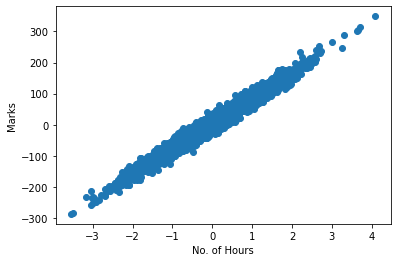

In [25]:
plt.scatter(X, y)
plt.xlabel("No. of Hours")
plt.ylabel("Marks")
plt.show()

### 3. Linear Regression

In [28]:
def hypothesis(x, theta):
    """
    Documentation :
    
    Parameteres :
    x : scalar
    theta : array (2,1)
    
    returns : scalar - prediction
    
    """
    return theta[0] + theta[1]*x

In [31]:
def error(X, y, theta):
    """
    X : np.array - (3750, 1)
    y : np.array - (3750, 1)
    theta : array (2,1)
    
    Returns : scalar : total error of the hypothesis
    """
    
    m = X.shape[0]
    total_err = 0.0
    
    for i in range(m):
        hx = hypothesis(X[i], theta)
        total_err += (hx - y[i])**2
    
    return total_err/m

In [36]:
def gradient(X, y, theta):
    """
    X : np.array - (3750, 1)
    y : np.array - (3750, 1)
    theta : array (2,1)
    
    Return : derivates of Loss Func, w.r.t all the thetas
            np.array(2,1)
    """
    
    m = X.shape[0]
    grad = np.zeros((2,1))
    
    for i in range(m):
        hx = hypothesis(X[i], theta)
        grad[0] += (hx - y[i])*1
        grad[1] += (hx - y[i])*X[i]
    
    return grad/m

In [80]:
# ==========================================
#            TRAINING FUNCTION
# ==========================================

def gradient_descent(X, y, lr = 0.1, max_itr = 100):
    """
    X : np.array - (3750, 1)
    y : np.array - (3750, 1)
    lr : Learning Rate : default = 0.01
    max_itr : Max iteration 
    
    Returns : theta - np.array(2,1)
              error_list - list of error of different models.
    """
    theta = np.random.randint(-1, 1, size=(2,1))
    
    error_list = []
    
    for i in range(max_itr):
        err = error(X, y, theta)
        error_list.append(err[0])
        
        grad = gradient(X, y, theta)
        
        # Updation Rule
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
    

    return (theta, error_list)

### 4. Model Training

In [87]:
(theta, error_list)  = gradient_descent(X, y, lr = 0.1, max_itr=100)

In [88]:
theta

array([[ 0],
       [71]])

In [89]:
error_list[-5:]

[291.938145421724,
 291.938145421724,
 291.938145421724,
 291.938145421724,
 291.938145421724]

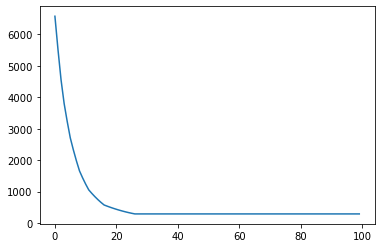

In [90]:
plt.plot(error_list)
plt.show()

In [91]:
y_pred = hypothesis(X, theta)

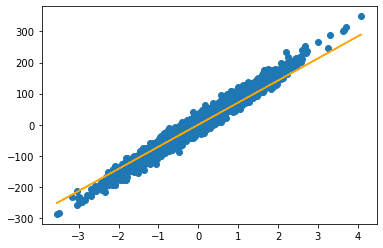

In [92]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='orange')
plt.show()

## Prediction : Test Data

In [95]:
X_test = pd.read_csv("./Test Cases/Linear_X_Test.csv").values

In [97]:
X_test.shape

(1250, 1)

In [99]:
y_test_pred = hypothesis(X_test, theta )

In [103]:
df = pd.DataFrame(y_test_pred, columns=['y'])

In [106]:
df.to_csv("./prediction.csv", index=False)

## Evaluation

In [112]:
def r2_score(Y, Y_hat):
    """
    calculates the coeff of determination.
    """
    num = np.sum((Y_hat - Y)**2)
    denom = np.sum((Y.mean() - Y)**2)
    
    return np.round((1 - num/denom)*100)

In [113]:
r2_score(y, y_pred)

96.0

## Sklearn / Scikit - learn

In [114]:
! pip install scikit-learn

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
lin_reg = LinearRegression()

In [117]:
# fit -> training
lin_reg.fit(X, y)

LinearRegression()

In [118]:
# theta0
lin_reg.intercept_

array([3.72798828])

In [120]:
# theta1
lin_reg.coef_

array([[80.54363185]])

In [125]:
# Prediction for 1 e.g
lin_reg.predict(np.array([[2.5]]))

array([[205.08706792]])

In [128]:
# Prediction for all
y_pred_sk = lin_reg.predict(X)

In [129]:
lin_reg.score(X, y)

0.9709612233822353

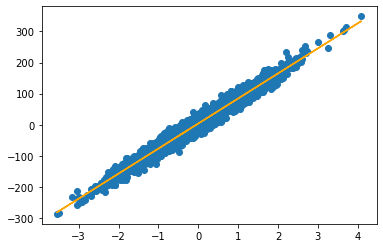

In [130]:
plt.scatter(X, y)
plt.plot(X, y_pred_sk, color='orange')
plt.show()